In [20]:
import re
import os
import sys
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


def find_files(directory, startswith=".json"):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.startswith(startswith):
                yield os.path.join(root, file)

def load_json(file):
    with open(file, 'r') as f:
        return json.load(f)
    
def load_task_results(path, task):
    results = []

    for i in find_files(path, startswith=task):
        dim = re.search(r'dim=(\d+)', i).group(1)
        data = load_json(i)["scores"]["test"][0]
        results.append({'dim': int(dim)} | data)

    results = pd.DataFrame(results).set_index('dim').sort_index()

    return results

def plot_results(results, columns=None, filter_func=None, ylabel="", xlabel="", title="", ax=None, alpha=1, legend=True, linestyle='-'):
    if columns is None:
        columns = results.select_dtypes(include=[np.number]).columns.values
    if filter_func is not None:
        columns = columns[list(map(filter_func, columns))]
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 3))
    plt.gca().set_prop_cycle(None)
    results[columns].plot(marker='o', linestyle=linestyle, ax=ax, title=title, alpha=alpha)
    plt.xscale('log', base=2, subs=[2, 4, 8, 16, 32, 64, 128, 256])
    plt.xticks([2**i for i in range(1, 9)], [2**i for i in range(1, 9)])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if not legend:
        ax.legend().remove()

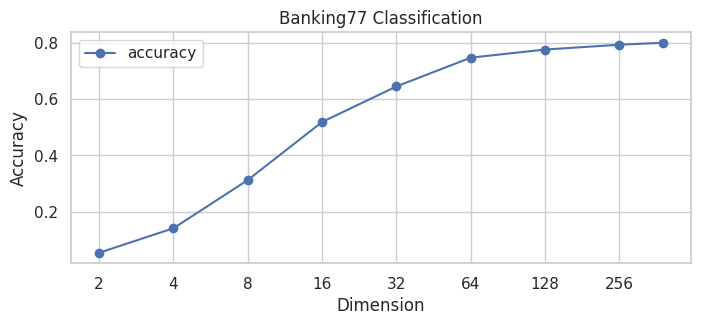

In [21]:
results = load_task_results("results_all/results", "Banking77Classification")
plot_results(results, ['accuracy'], ylabel="Accuracy", xlabel="Dimension", title="Banking77 Classification")

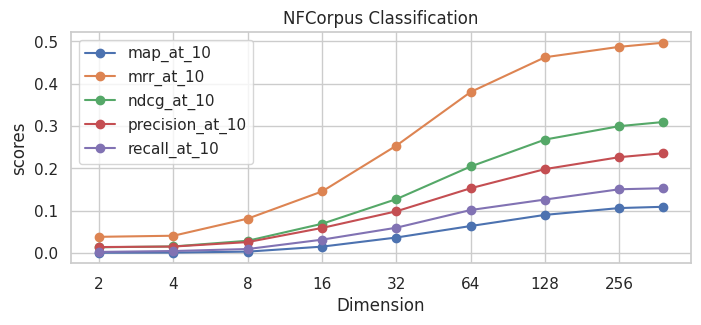

In [22]:
results = load_task_results("results_all/results", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification")

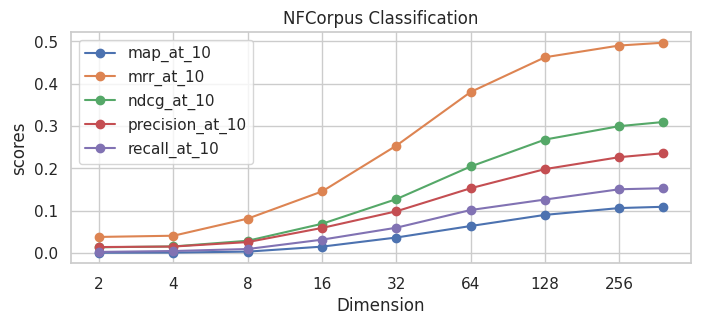

In [23]:
results = load_task_results("results_all/results2", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification")

### Results - pairwise only, no skip connection, shallow adapter

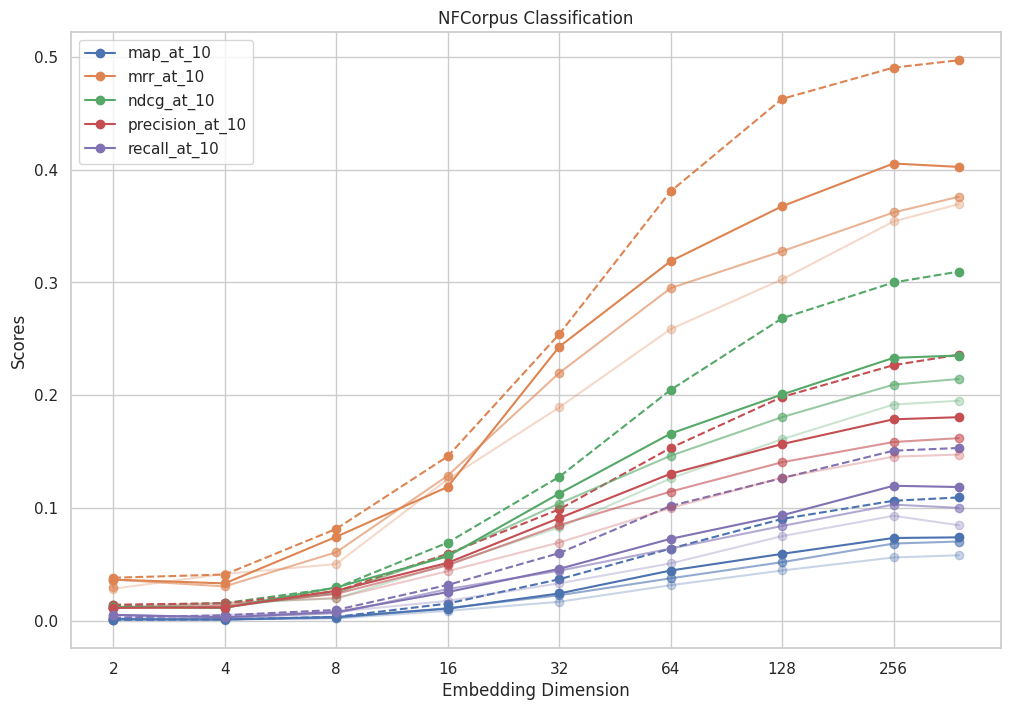

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
results = load_task_results("results_all/results2", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, linestyle='--')
results = load_task_results("results_all/results_pairwise_0", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.3, legend=False)
results = load_task_results("results_all/results_pairwise_10", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.6, legend=False)
results = load_task_results("results_all/results_pairwise_24", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="Scores", xlabel="Embedding Dimension", title="NFCorpus Classification", ax=ax, alpha=1)

### Results - pairwise only, + skip connection, shallow adapter

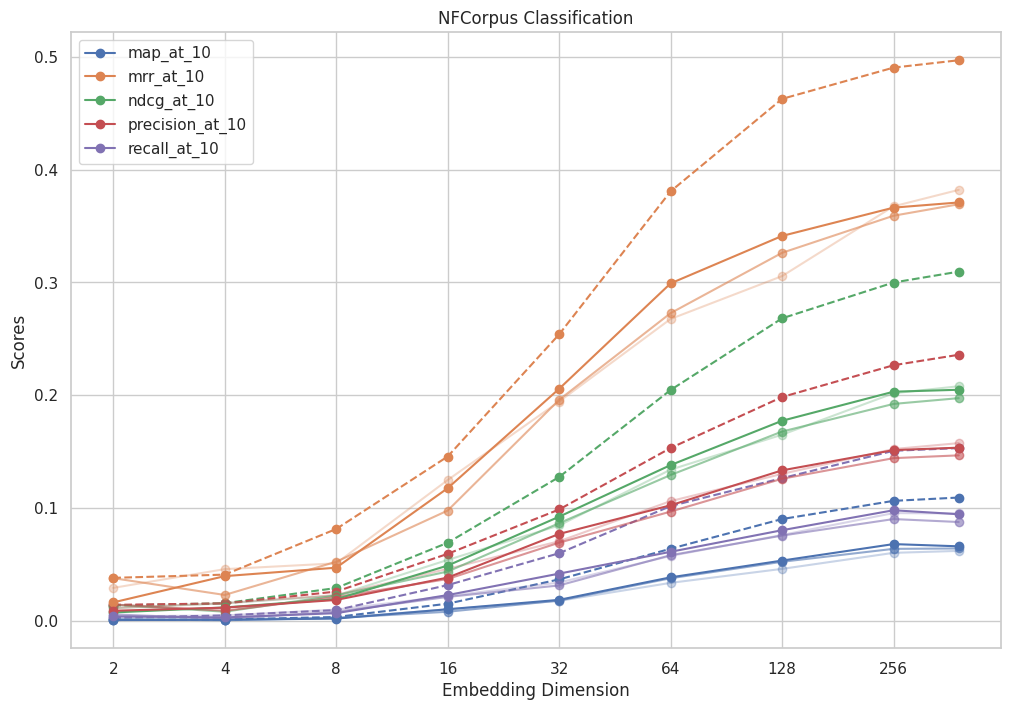

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
results = load_task_results("results_all/results2", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, linestyle='--')
results = load_task_results("results_all/results_pairwise_skip_0", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.3, legend=False)
results = load_task_results("results_all/results_pairwise_skip_10", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.6, legend=False)
results = load_task_results("results_all/results_pairwise_skip_24", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="Scores", xlabel="Embedding Dimension", title="NFCorpus Classification", ax=ax, alpha=1)

### Results - pairwise only, + skip connection, shallow adapter, normalized adapter output

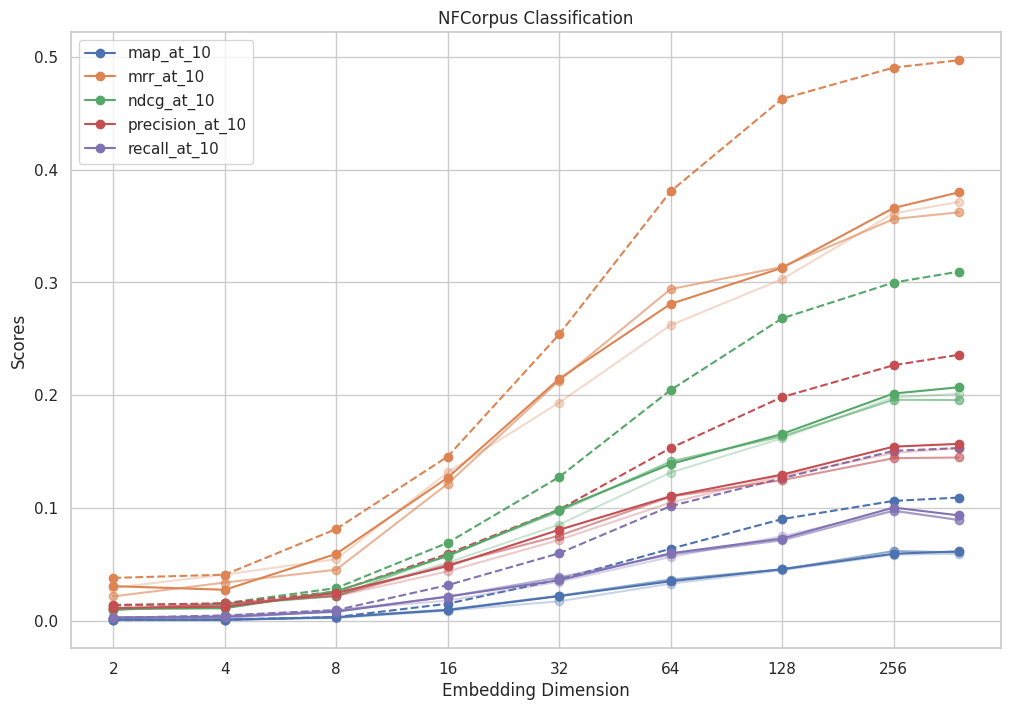

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
results = load_task_results("results_all/results2", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, linestyle='--')
results = load_task_results("results_all/results_pairwise_skip_normalized_0", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.3, legend=False)
results = load_task_results("results_all/results_pairwise_skip_normalized_10", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.6, legend=False)
results = load_task_results("results_all/results_pairwise_skip_normalized_24", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="Scores", xlabel="Embedding Dimension", title="NFCorpus Classification", ax=ax, alpha=1)

### Pairwise + RegLoss, + skip connection, shallow adapter, layernorm on skip 

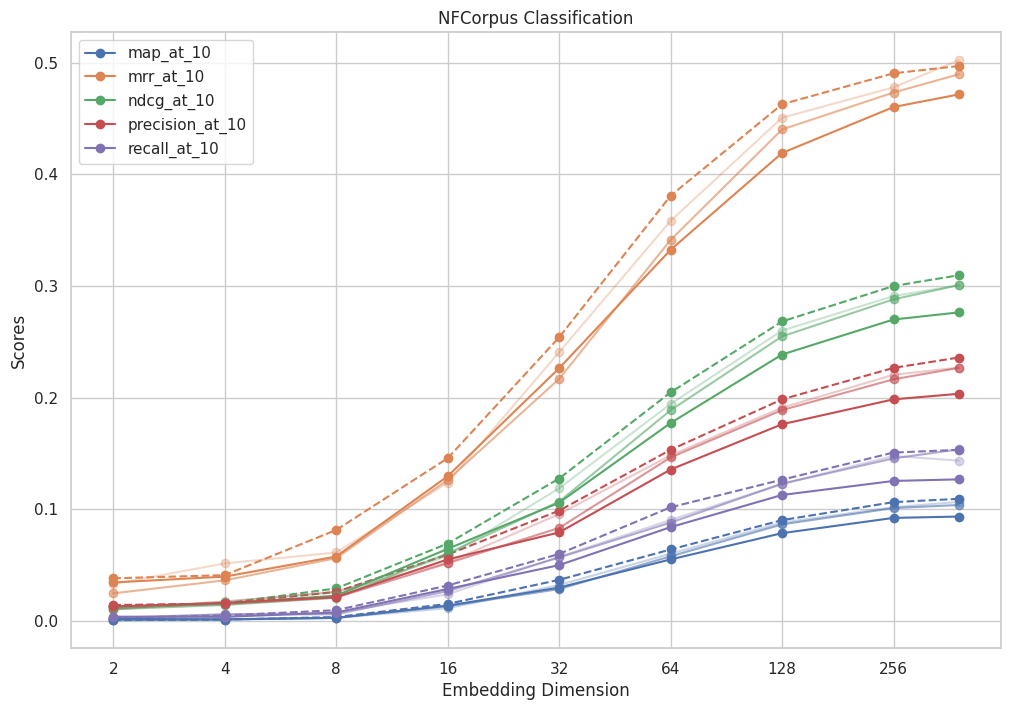

In [27]:
# forgot normalization on the outputs on this one
fig, ax = plt.subplots(figsize=(12, 8))
results = load_task_results("results_all/results2", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, linestyle='--')
results = load_task_results("results_all/results_pairwise_reg_skip_layernorm_0", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.3, legend=False)
results = load_task_results("results_all/results_pairwise_reg_skip_layernorm_10", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.6, legend=False)
results = load_task_results("results_all/results_pairwise_reg_skip_layernorm_24", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="Scores", xlabel="Embedding Dimension", title="NFCorpus Classification", ax=ax, alpha=1)

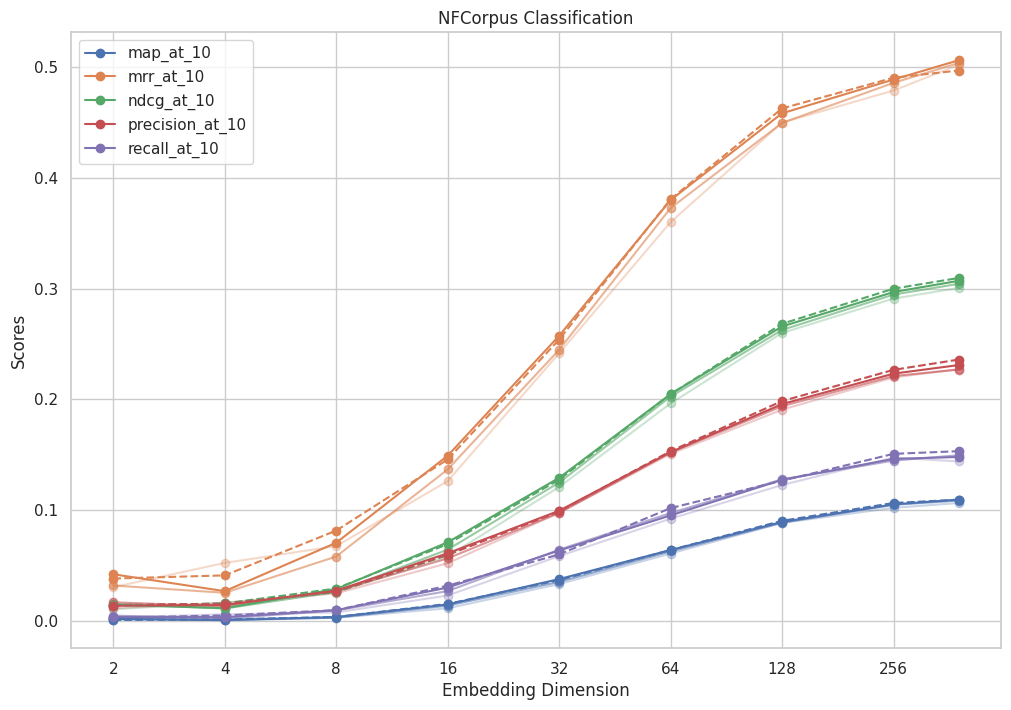

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
results = load_task_results("results_all/results2", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, linestyle='--')
results = load_task_results("results_all/results_pairwise_reg_skip_layernorm_0_normend", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.3, legend=False)
results = load_task_results("results_all/results_pairwise_reg_skip_layernorm_10_normend", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.6, legend=False)
results = load_task_results("results_all/results_pairwise_reg_skip_layernorm_24_normend", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="Scores", xlabel="Embedding Dimension", title="NFCorpus Classification", ax=ax, alpha=1)

### Pairwise + RegLoss, + skip connection, shallow adapter, layernorm on skip, more data

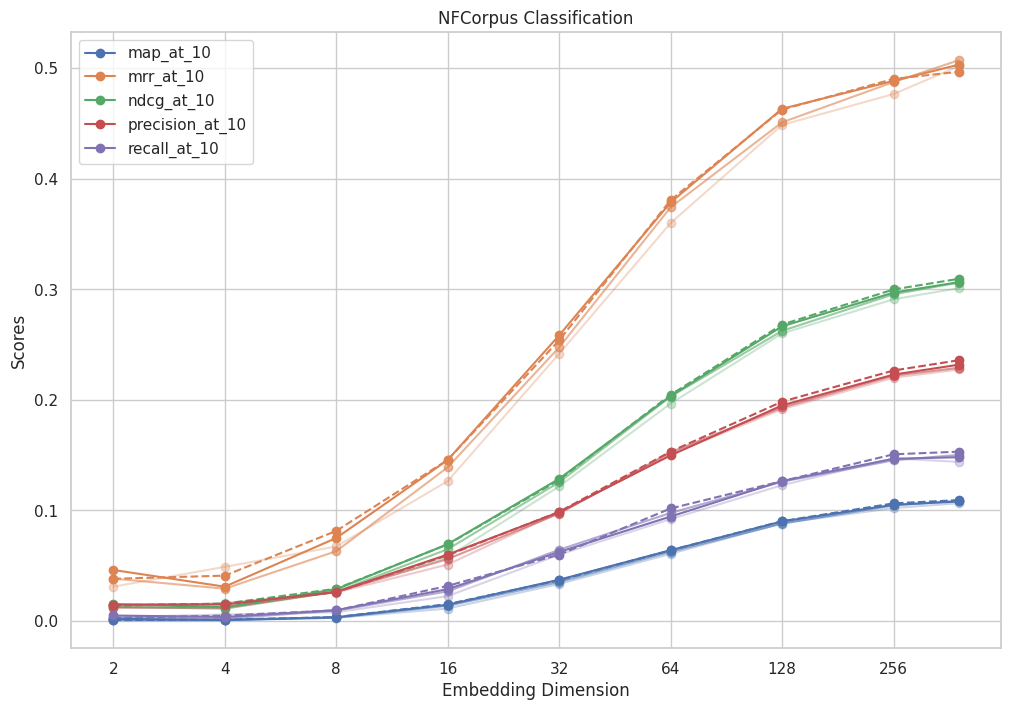

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
results = load_task_results("results_all/results2", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, linestyle='--')
results = load_task_results("results_all/results_pairwise_reg_skip_layernorm_0_normend_95", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.3, legend=False)
results = load_task_results("results_all/results_pairwise_reg_skip_layernorm_10_normend_95", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.6, legend=False)
results = load_task_results("results_all/results_pairwise_reg_skip_layernorm_24_normend_95", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="Scores", xlabel="Embedding Dimension", title="NFCorpus Classification", ax=ax, alpha=1)

### Final for now: Pairwise + RegLoss + TopkLoss, + skip connection, shallow adapter, layernorm on skip, more data

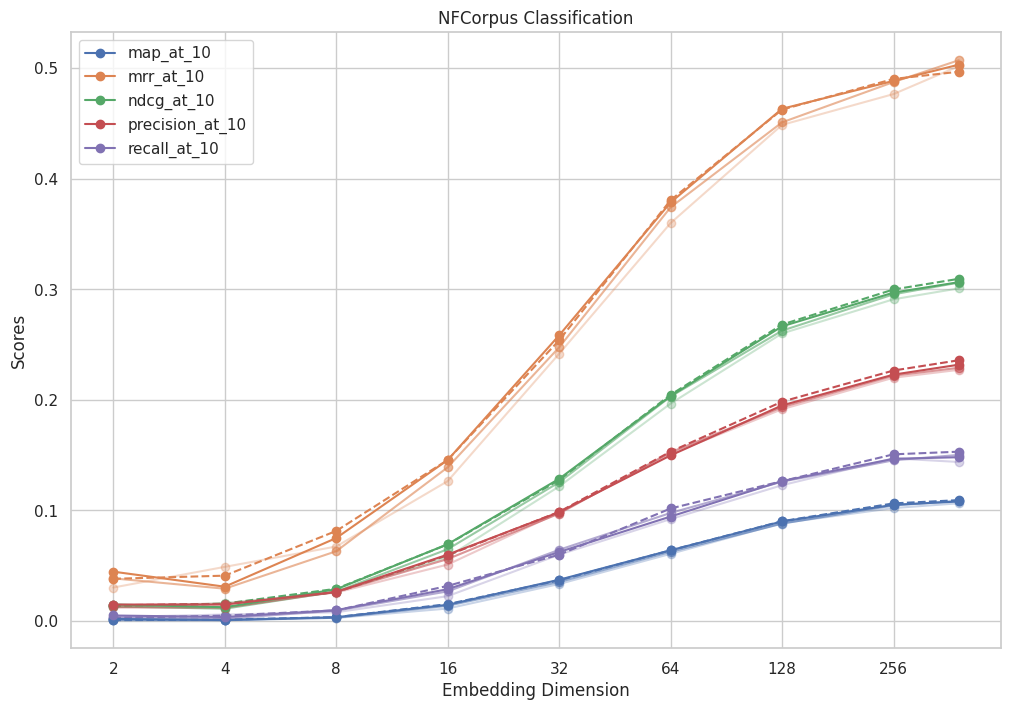

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
results = load_task_results("results_all/results2", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, linestyle='--')
results = load_task_results("results_all/pairwise_reg_topk_skip_layernorm_0", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.3, legend=False)
results = load_task_results("results_all/pairwise_reg_topk_skip_layernorm_10", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="scores", xlabel="Dimension", title="NFCorpus Classification", ax=ax, alpha=0.6, legend=False)
results = load_task_results("results_all/pairwise_reg_topk_skip_layernorm_24", "NFCorpus")
plot_results(results, filter_func=lambda x: x.endswith("at_10"), ylabel="Scores", xlabel="Embedding Dimension", title="NFCorpus Classification", ax=ax, alpha=1)